In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("gm12878.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,279.38,279.38,279.38,279.38,279.38,279.38,279.38,279.38,279.38,279.38,279.38,279.38
1,68.21,68.21,68.21,68.21,68.21,68.21,68.21,68.21,68.21,68.21,68.21,68.21
2,53.38,53.38,53.38,53.38,53.38,53.38,53.38,53.38,53.38,53.38,53.38,53.38
3,119.70,119.70,119.70,119.70,119.70,119.70,119.70,119.70,119.70,119.70,119.70,119.70
4,90.48,90.48,90.48,90.48,90.48,90.48,90.48,90.48,90.48,90.48,90.48,90.48
...,...,...,...,...,...,...,...,...,...,...,...,...
9061,61.13,61.13,61.13,61.13,61.13,61.13,61.13,61.13,61.13,61.13,61.13,61.13
9062,85.51,85.51,85.51,85.51,85.51,85.51,85.51,85.51,85.51,85.51,85.51,85.51
9063,70.82,70.82,70.82,70.82,70.82,70.82,70.82,70.82,70.82,70.82,70.82,70.82
9064,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33,21.33


In [5]:
normalized_features = Normalizer().fit_transform(features)

In [6]:
normalized_features = pd.DataFrame(normalized_features) 

In [7]:
normalized_features.columns = ['DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 

In [8]:
normalized_features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
1,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
2,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
3,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
4,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
9062,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
9063,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675
9064,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(normalized_features, normalized_features))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [10]:
import seaborn as sns 

#sns.clustermap(normalized_features)

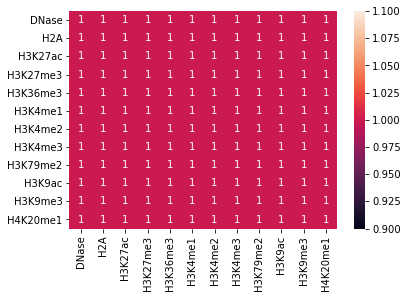

In [11]:
# generating correlation heatmap 
sns.heatmap(normalized_features.corr(), annot = True) 

plt.show() 

## Silhouette coefficient

C:\Users\leyen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\leyen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\leyen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\leyen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(

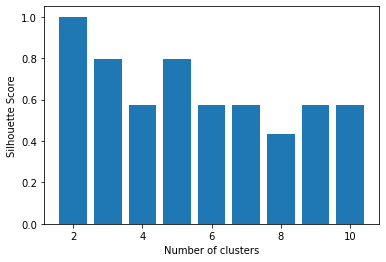

In [12]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [13]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [14]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=2, random_state=12)

In [15]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

1.1830123621525495e-28
[[0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513
  0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]
3


In [16]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

C:\Users\leyen\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\leyen\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\leyen\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\leyen\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\leyen\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\leyen\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

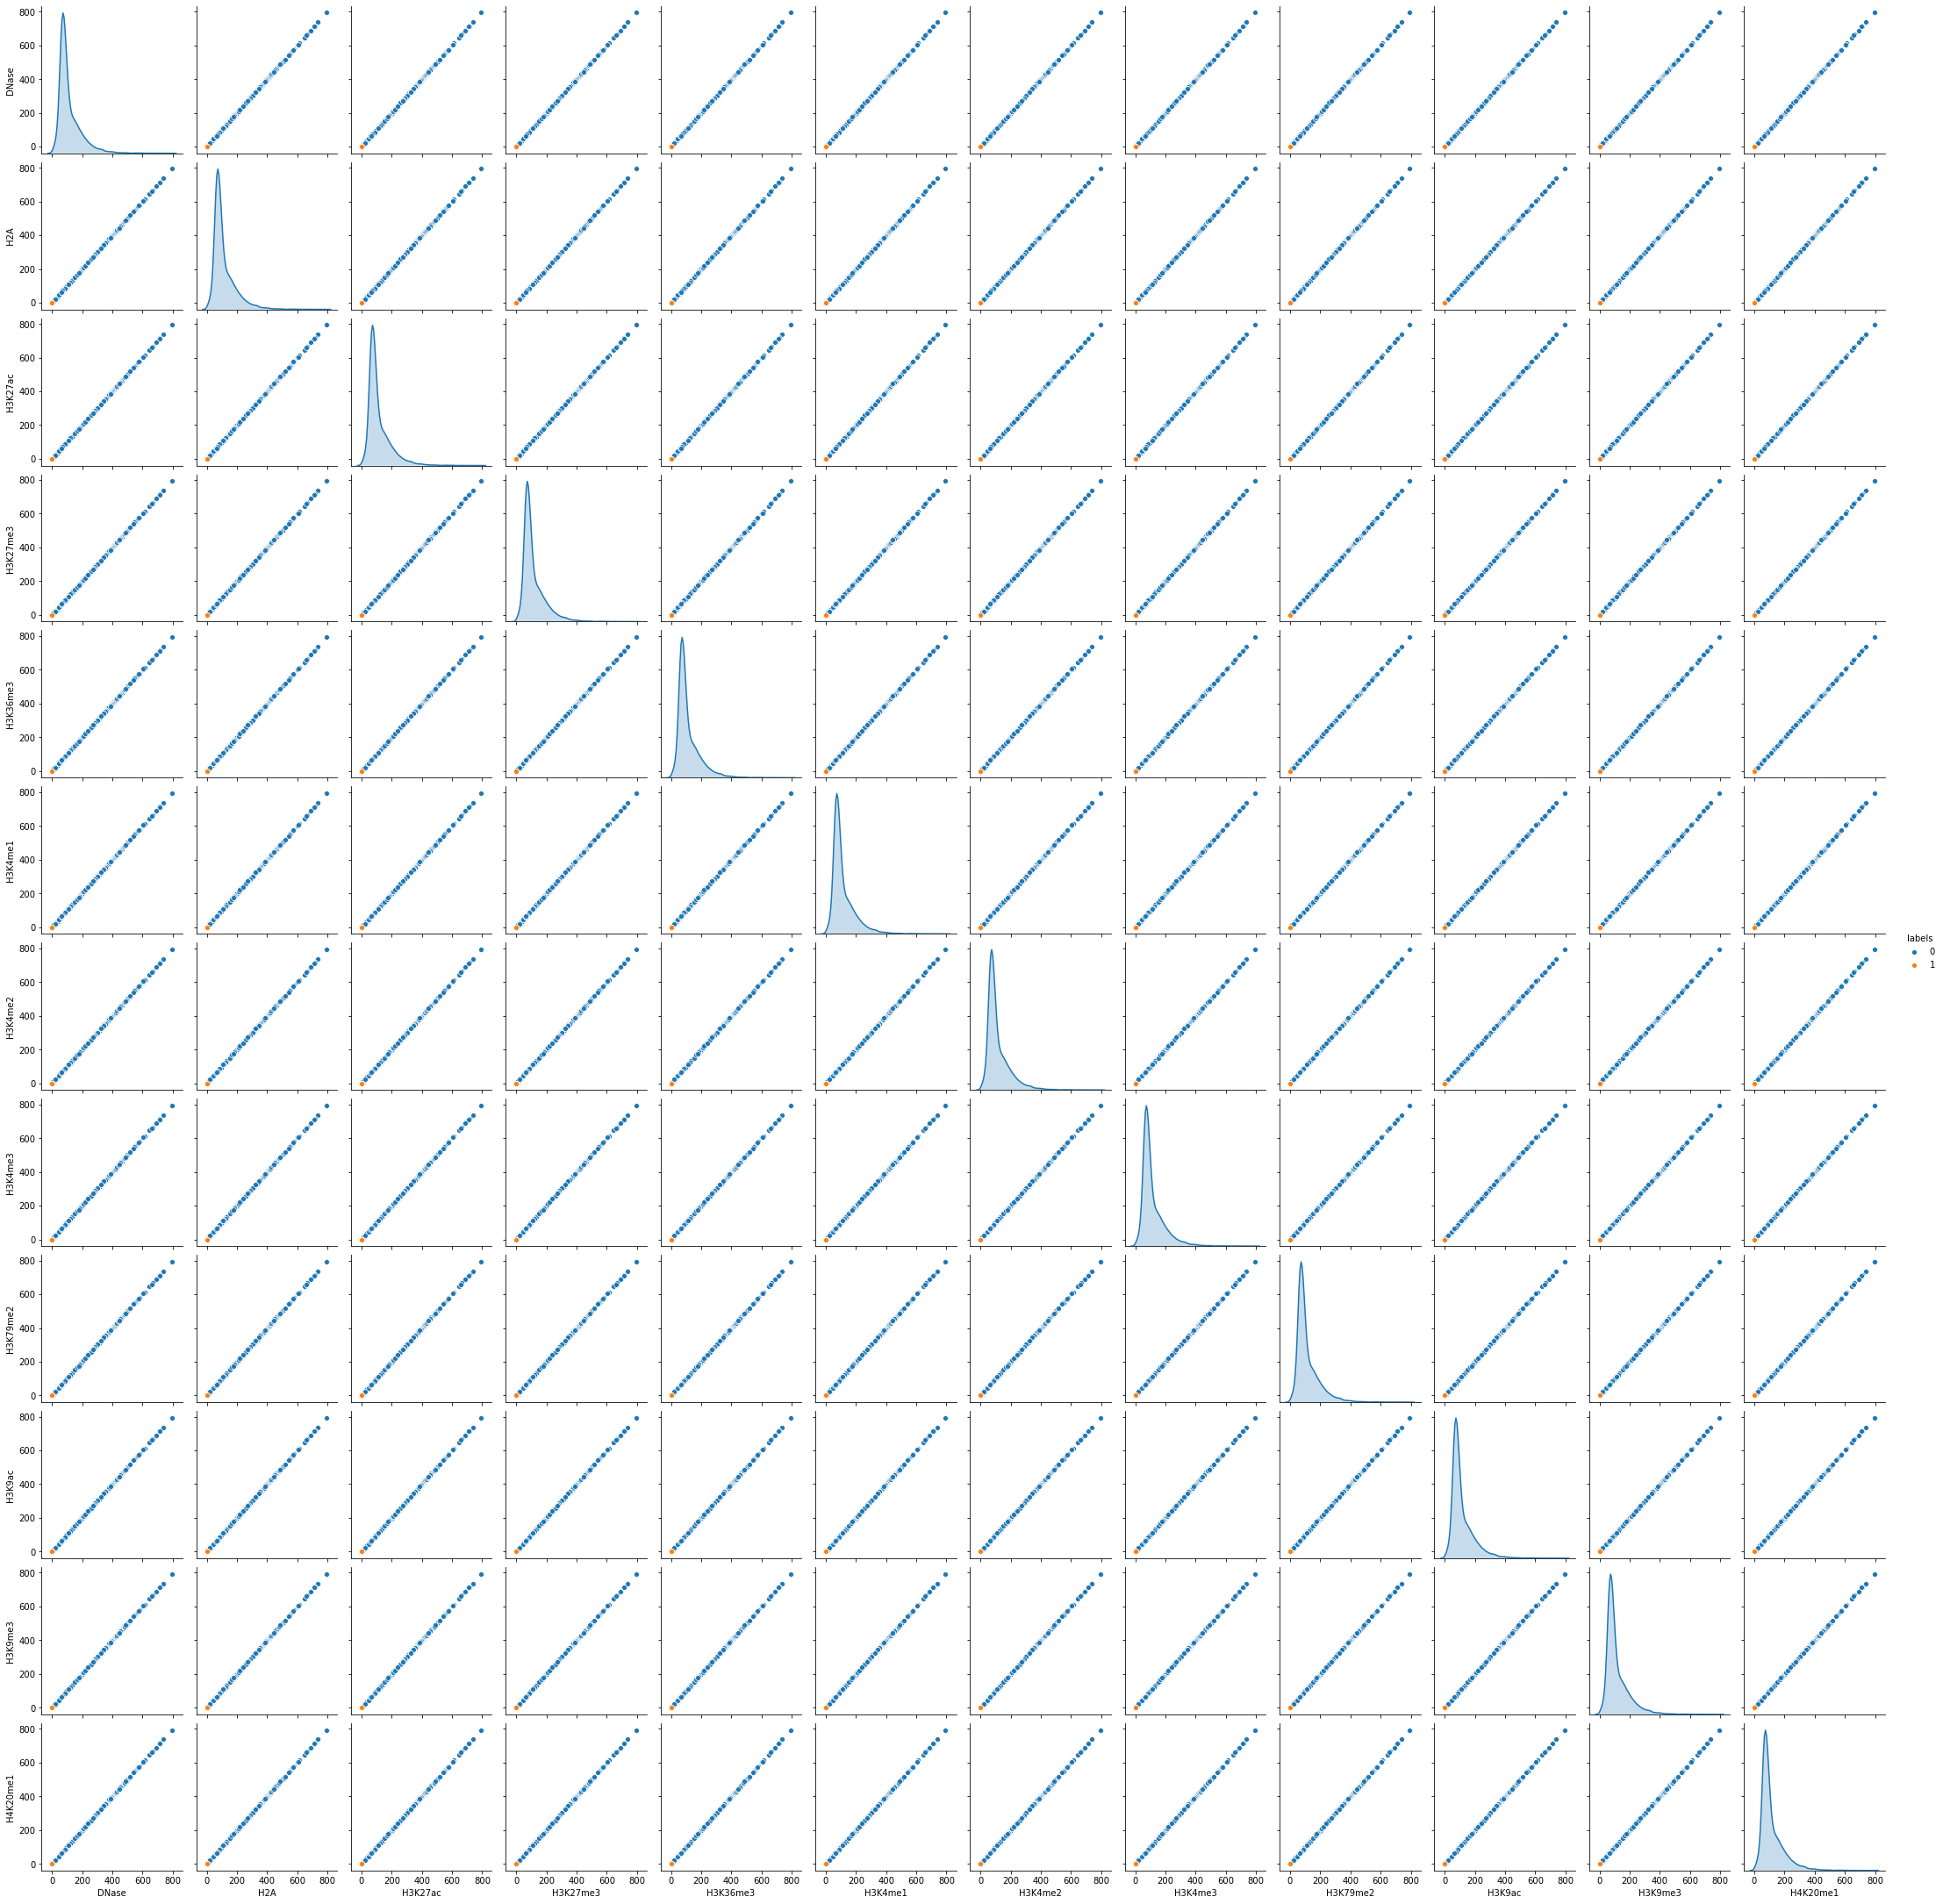

In [17]:
sns.pairplot(labeled,hue='labels')